* Students Adaptability Level Prediction in Online Education Via Machine Learning & Deep Learning;

->Online education has become increasingly popular in recent years, as it provides students with the flexibility to learn at their own pace and from anywhere in the world. However, not all students are equally adaptable to online learning. Some students may find it difficult to stay motivated and engaged in an online environment, while others may struggle with the technical aspects of online learning.

This dataset can be used to explore a variety of research questions related to student adaptability in online education. For example, researchers could use the dataset to investigate the relationship between student characteristics and adaptability, or to identify the factors that contribute to student success in online learning. The dataset could also be used to develop predictive models that can be used to identify students who are at risk of struggling in online education.

Here are some of the key questions that can be addressed using the dataset:

1. What are the factors that influence student adaptability in online education?
1. How can we identify students who are at risk of struggling in online education?
1. How can we improve the quality of online learning experiences for students?

* **Required things And Import Librarries;**

In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
%matplotlib inline
import plotly.graph_objects as go

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Importing the basic librarires for building model - classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler

* Data Reads & Dataset Informations;

In [4]:
df =pd.read_csv("../input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv")

In [5]:
df.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


In [6]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [7]:
# looking the shape DataSet
df.shape

(1205, 14)

In [8]:
#Cheacking Missing values of the Dataset
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [9]:
# look  describe data set

df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


* Data Visualizations and EDA Analysis

<Axes: ylabel='Adaptivity Level'>

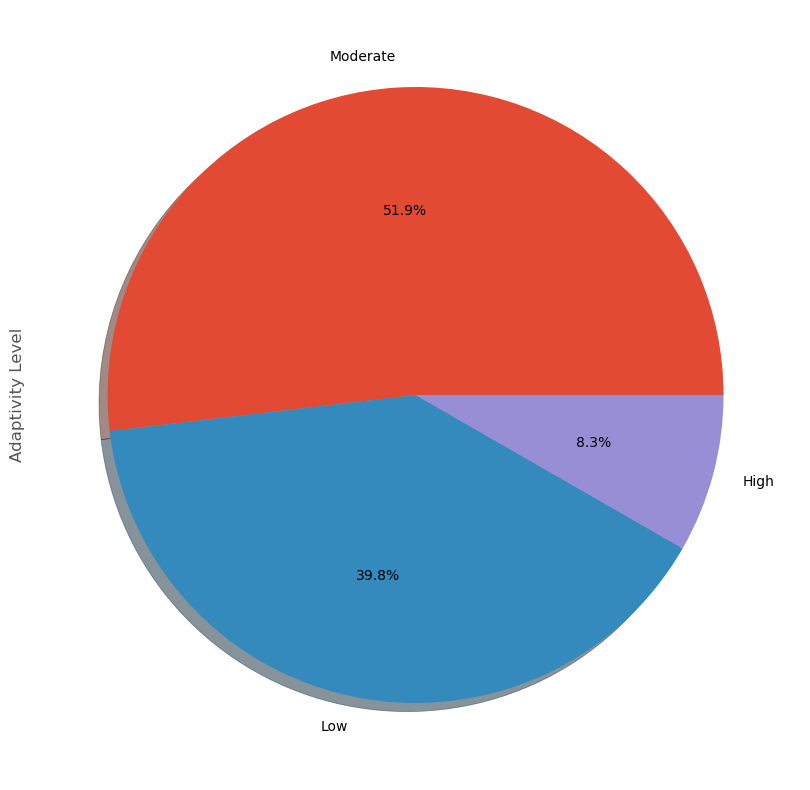

In [10]:
# Show the percentage Adaptivity Level in Dataset

plt.figure(figsize=(12,10))
df['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

->The percentage Adaptivity Level in Dataset

Low = 39.8%, 

Moderate = 51.9%,

High = 8.3 %

<Axes: ylabel='Gender'>

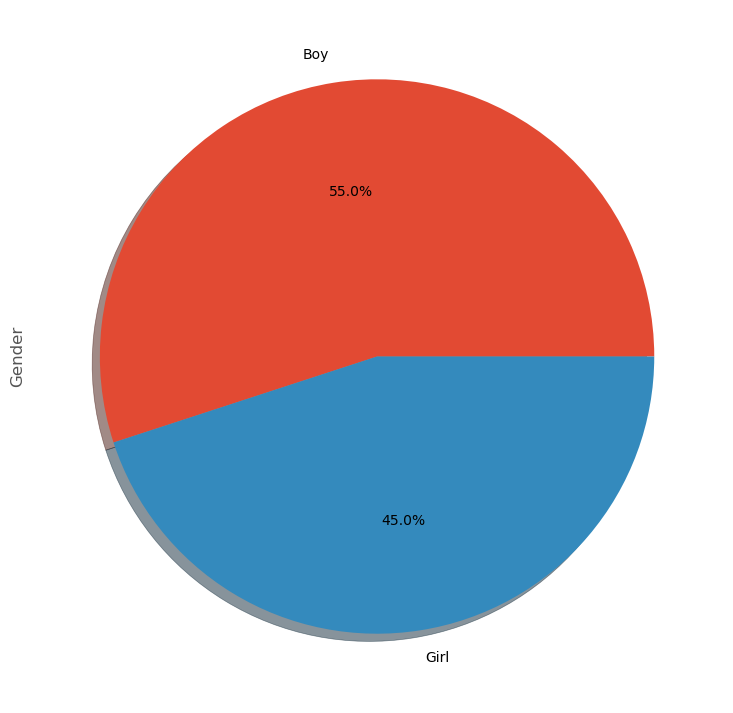

In [11]:
# Show the percentage Gender in Dataset

plt.figure(figsize=(13,9))

df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

->The percentage Gender in Dataset

Boy= 55%,

Girl = 45 %

<Axes: ylabel='Device'>

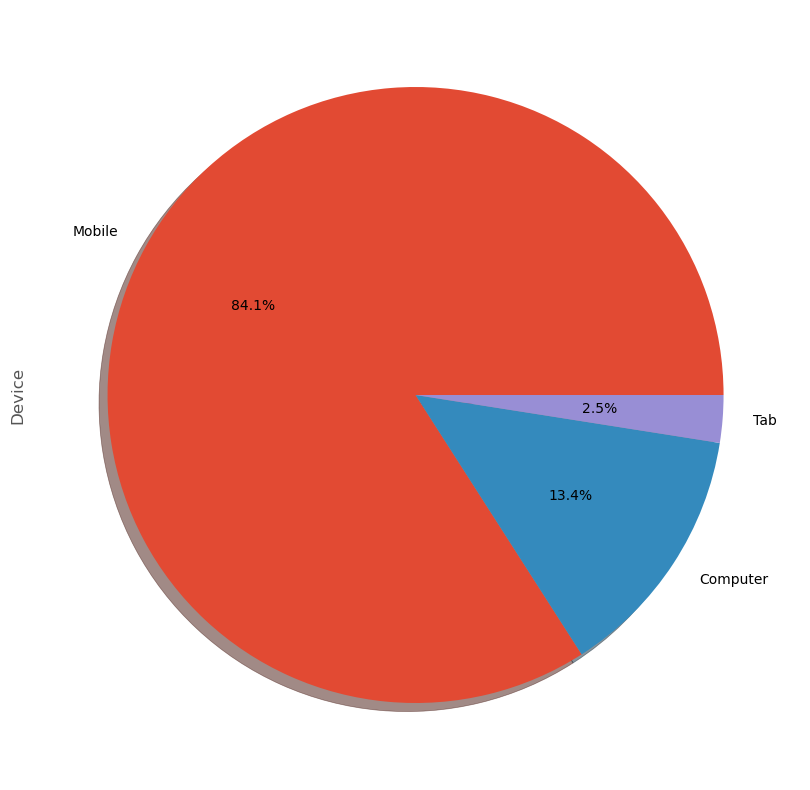

In [12]:
# Show the Device using in Dataset

plt.figure(figsize=(11,10))


df['Device'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

->The Device using in Dataset

Mobile = 84.1%,

Computer = 13.4%,

Tab = 2.5%

* Data Pre-Processing And Feature Extractions:

We need change all data type using LabelEncoding Techniques

In [13]:
data=df

label_encoders = {}
categorical_columns = data.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [14]:
data.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
5,0,1,1,1,0,1,1,1,0,1,1,0,1,1
6,0,1,1,1,0,1,1,0,1,2,0,0,1,1
7,0,1,1,1,0,1,1,0,1,2,1,0,1,2
8,0,2,0,0,0,1,1,0,1,2,1,0,1,1
9,0,1,1,1,0,1,1,0,0,1,1,0,1,2


In [15]:
#Defined X value and y value , and split the data train
X = data.drop(columns="Adaptivity Level")           
y = data["Adaptivity Level"]    # y = quality

In [16]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [17]:
X_train.shape

(964, 13)

In [18]:
X_test.shape

(241, 13)

* Machine Learning Algorithms Build & Performance Comparisions;

In [19]:
#Defined object from library classification  without Fine tuning Methods

LR = LogisticRegression()
DTR = DecisionTreeClassifier()

RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()

MLP = MLPClassifier()
XGB = XGBClassifier()
SVC=SVC()

In [20]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVC]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 66.39004149377593
DecisionTreeClassifier() : 90.87136929460581
RandomForestClassifier() : 91.70124481327801
KNeighborsClassifier() : 79.25311203319502


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier() : 83.81742738589212
KNeighborsClassifier() : 79.25311203319502
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) : 91.70124481327801
SVC() : 73.44398340248964


The best ML Model is RandomForestClassifier-> 92.12% Accuracy

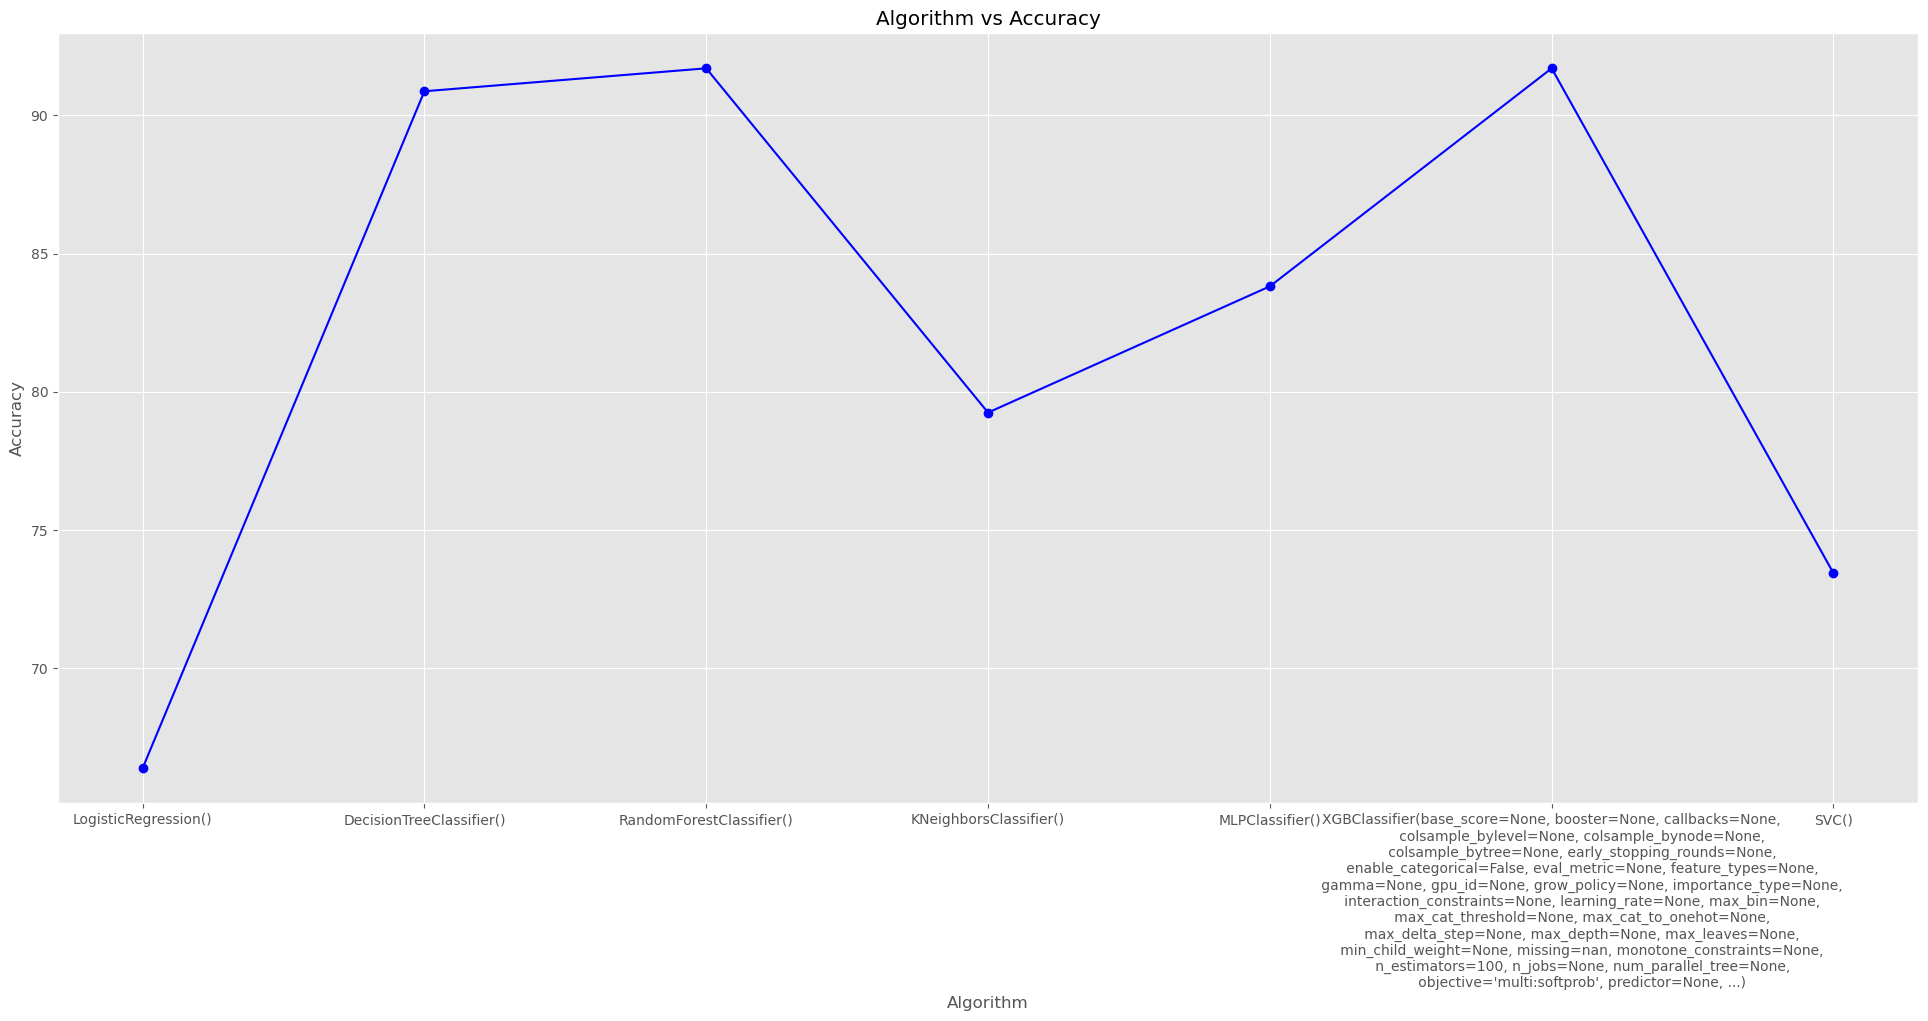

In [21]:
# make graph about Accuracy

plt.figure(figsize=(24, 10))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='blue')
plt.show()

-> Deep Neural Networks Model Performance Analysis

In [22]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [23]:
# building model and we made split the data - train and test

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = X_train.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512 , activation = 'selu',kernel_initializer = 'lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256 , activation = 'selu' , kernel_initializer = 'lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3 , activation = 'softmax')
])

In [24]:
#Model Compiple
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy ,
              optimizer = tf.keras.optimizers.Nadam() ,
              metrics = ['accuracy'])

In [25]:
#Model Training
model.fit(X_train , y_train,
          epochs = 100,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss' ,mode = 'min', patience = 5)])

Epoch 1/100
31/31 [==============================] - 7s 6ms/step - loss: 1.0011 - accuracy: 0.5913
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.7313
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6273 - accuracy: 0.7583
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5630 - accuracy: 0.7707
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5200 - accuracy: 0.7894
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5240 - accuracy: 0.7853
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7873
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.8143
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.8039
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 0.8039
Epoch 11/

In [26]:
#Evaluate the Model Training 
a , score = model.evaluate(X_test , y_test)

print("The Score TF model :",score)

8/8 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8340
The Score TF model : 0.8340249061584473


In [27]:
#